In [2]:
#Import lib
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [25]:
#============  Read Data
df = pd.read_csv('dulieuxettuyendaihoc.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')
print(df)

       MSSV GT  DT   KV    M1    M2    M3  KT    NGAYTHI DINHHUONGNGHENGHIEP
0     SV001  F NaN  2NT  3.25  3.25  4.50  A1  12/7/2018                  No
1     SV002  M NaN    1  6.00  4.00  3.50   C  12/7/2018                 Yes
2     SV003  M NaN    1  5.00  6.75  4.00   C  12/7/2018                  No
3     SV004  M NaN    1  4.25  4.25  5.25  D1  12/7/2018                  No
4     SV005  M NaN  2NT  4.25  4.50  5.00   A  12/7/2018                  No
..      ... ..  ..  ...   ...   ...   ...  ..        ...                 ...
95   SV0096  F NaN    1  5.25  1.50  6.25   C  7/20/2022                 Yes
96   SV0097  F NaN    1  5.25  3.75  4.75   C  7/20/2022                  No
97   SV0098  M NaN  2NT  7.00  8.00  4.00   C  7/20/2022                 Yes
98   SV0099  M NaN    1  5.00  3.50  5.50   C  7/20/2022                  No
99  SV00100  M NaN  2NT  5.25  2.50  4.25   C  7/20/2022                 Yes

[100 rows x 10 columns]


In [27]:
# ============ Data Manipulation
# df.info()
# Rename NGAYTHI: NT, DINHHUONGNGHENGHIEP: NGHE
df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)
# ============ Print 5 row
print(df.head(5))

    MSSV GT  DT   KV    M1    M2    M3  KT         NT NGHE
0  SV001  F NaN  2NT  3.25  3.25  4.50  A1  12/7/2018   No
1  SV002  M NaN    1  6.00  4.00  3.50   C  12/7/2018  Yes
2  SV003  M NaN    1  5.00  6.75  4.00   C  12/7/2018   No
3  SV004  M NaN    1  4.25  4.25  5.25  D1  12/7/2018   No
4  SV005  M NaN  2NT  4.25  4.50  5.00   A  12/7/2018   No


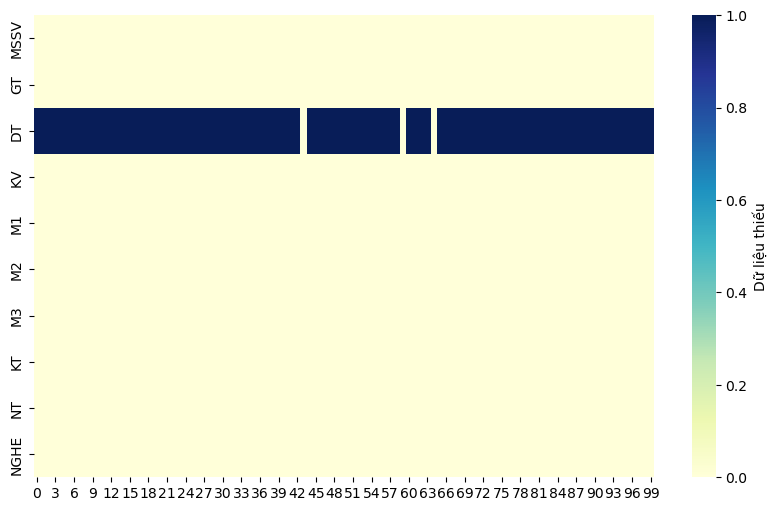

In [28]:
# ============ Biểu đồ trước khi điền giá trị bị thiếu
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()

In [29]:
#============  Thay thế các giá trị bị thiếu
df['DT'].fillna('KINH', inplace=True)
df['M1'].fillna(df['M1'].mean(), inplace=True)
df['M2'].fillna(df['M2'].median(), inplace=True)
df['M3'].fillna(0, inplace=True)

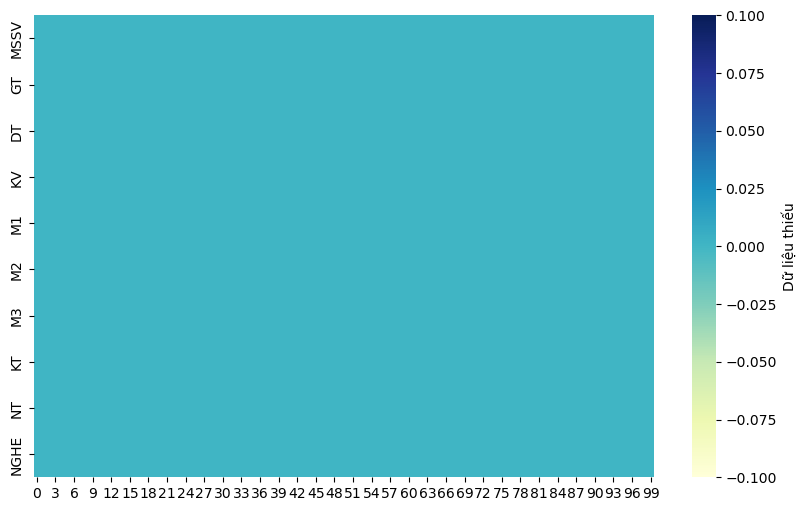

In [30]:
#============  Biểu đồ sau khi điền giá trị bị thiếu
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()


In [31]:

#============  Tạo cột điểm trung bình
TBM = df['TBM'] = (df['M1']+df['M2']+df['M3'])/3
print(TBM)


0     3.666667
1     4.500000
2     5.250000
3     4.583333
4     4.583333
        ...   
95    4.333333
96    4.583333
97    6.333333
98    4.666667
99    4.000000
Length: 100, dtype: float64


In [32]:
#============  Check điều kiện và gán dữ liệu
df.loc[df['TBM'] < 5.0, 'XL'] = 'FAIL'

df.loc[(df['TBM'] >= 5.0) & 
       (df['TBM'] < 7.0), 'XL'] = 'FAIR'

df.loc[(df['TBM'] >= 7.0) & 
       (df['TBM'] < 9.0), 'XL'] = 'GOOD'

df.loc[df['TBM'] >= 9.0, 'XL'] = 'EXCEL'
df


,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM,XL
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667,FAIL
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000,FAIL
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000,FAIR
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333,FAIL
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333,FAIL
...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333,FAIL
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333,FAIL
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333,FAIR
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667,FAIL


In [33]:
# Phuong phap Map
dict_map = {
    'A1':'G1', 'C':'G3', 'D1': 'G3', 'A': 'G1', 'B': 'G2'
}
df['NHOM'] = df['KT'].map(dict_map)
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM,XL,NHOM
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667,FAIL,G1
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000,FAIL,G3
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000,FAIR,G3
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333,FAIL,G3
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333,FAIL,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333,FAIL,G3
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333,FAIL,G3
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333,FAIR,G3
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667,FAIL,G3


In [34]:

# Tạo biến só điểm cộng
def fplus(x,y):
    if (x == 'G1' or x == 'G2') and (y >= 4.0):
        return 1.0
    else:
        return 0.0

df['PLUS'] = list(map(fplus,df['NHOM'],df['TBM']))
df


,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM,XL,NHOM,PLUS
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667,FAIL,G1,0.0
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000,FAIL,G3,0.0
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000,FAIR,G3,0.0
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333,FAIL,G3,0.0
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333,FAIL,G1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333,FAIL,G3,0.0
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333,FAIL,G3,0.0
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333,FAIR,G3,0.0
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667,FAIL,G3,0.0
